In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [4]:
root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.insert(0, root_path)

from data_preprocessing import DataPreprocessing
from plotting import Plotting

## Data processing

In [5]:
my_data = DataPreprocessing()

In [6]:
my_data.read_data("../data/processed/agric_survey_data.csv")

elevation   latitude  longitude        location      slope  rainfall  \
0     786.05580  -7.389911  -7.556202    rural_akatsi  14.795113    1125.2   
1     674.33410  -7.736849  -1.051539    rural_sokoto  11.374611    1450.7   
2     826.53390  -9.926616   0.115156    rural_sokoto  11.339692    2208.9   
3     574.94617  -2.420131  -6.592215  rural_kilimani   7.109855     328.8   
4     331.35538 -13.409517  -6.722849   rural_hawassa   5.907423    1586.0   
...         ...        ...        ...             ...        ...       ...   
5402  681.36145  -7.358371  -6.254369    rural_akatsi  16.213196     885.7   
5403  667.02120  -3.154559  -4.475046  rural_kilimani   2.397553     501.1   
5404  670.77900 -14.472861  -6.110221   rural_hawassa   7.636470    1586.6   
5405  429.48840 -14.653089  -6.984116   rural_hawassa  13.944720    1272.2   
5406  763.09030  -4.317028  -6.344461  rural_kilimani  35.189430     516.4   

      min_temperature_c  max_temperature_c  ave_temps  soil_fertility  \
0                  -3.1               33.1      15.00            0.62   
1                  -3.9               30.6      13.35            0.64   
2                  -1.8               28.4      13.30            0.69   
3                  -5.8               32.2      13.20            0.54   
4                  -6.8               31.8      12.50            0.63   
...                 ...                ...        ...             ...   
5402               -4.3               33.4      14.55            0.61   
5403               -4.8               32.1      13.65            0.54   
5404               -3.8               33.4      14.80            0.64   
5405               -6.2               34.6      14.20            0.63   
5406               -3.8               29.6      12.90            0.64   

     soil_type        ph  pollution_level crop_type  standard_yield  
0        sandy  6.169393     8.526684e-02   cassava        0.577964  
1     volcanic  5.676648     3.996838e-01   cassava        0.486302  
2     volcanic  5.331993     3.580286e-01       tea        0.649647  
3        loamy  5.328150     2.866871e-01   cassava        0.532348  
4         silt  7.061317     4.315457e-07    banana        0.342871  
...        ...       ...              ...       ...             ...  
5402     sandy  5.741063     3.286828e-01    potato        0.554482  
5403     sandy  5.445833     1.602583e-01     maize        0.438194  
5404  volcanic  5.385873     8.221326e-09       tea        0.800776  
5405      silt  5.562508     6.917245e-10   cassava        0.507595  
5406     sandy  5.087792     2.612715e-01     wheat        0.453064  

[5407 rows x 15 columns]

In [7]:
my_data.data.head(10)

elevation   latitude  longitude        location      slope  rainfall  \
0  786.05580  -7.389911  -7.556202    rural_akatsi  14.795113    1125.2   
1  674.33410  -7.736849  -1.051539    rural_sokoto  11.374611    1450.7   
2  826.53390  -9.926616   0.115156    rural_sokoto  11.339692    2208.9   
3  574.94617  -2.420131  -6.592215  rural_kilimani   7.109855     328.8   
4  331.35538 -13.409517  -6.722849   rural_hawassa   5.907423    1586.0   
5  790.73846  -3.785356  -1.470468  rural_kilimani  15.380596    1188.3   
6  742.72180 -10.237509  -0.736216    rural_sokoto   3.431843    2143.3   
7  747.38030  -3.767334  -3.105643  rural_kilimani   8.239554     796.6   
8  756.92020  -7.538599  -0.578555    rural_sokoto   9.371509    1544.7   
9  393.83450 -12.855317  -8.159821    rural_akatsi  36.340670    1753.3   

   min_temperature_c  max_temperature_c  ave_temps  soil_fertility soil_type  \
0               -3.1               33.1      15.00            0.62     sandy   
1               -3.9               30.6      13.35            0.64  volcanic   
2               -1.8               28.4      13.30            0.69  volcanic   
3               -5.8               32.2      13.20            0.54     loamy   
4               -6.8               31.8      12.50            0.63      silt   
5               -3.0               31.0      14.00            0.63     sandy   
6               -2.6               28.2      12.80            0.66  volcanic   
7               -3.8               32.7      14.45            0.58     sandy   
8               -3.1               30.5      13.70            0.64  volcanic   
9               -6.3               31.8      12.75            0.74      silt   

         ph  pollution_level crop_type  standard_yield  
0  6.169393     8.526684e-02   cassava        0.577964  
1  5.676648     3.996838e-01   cassava        0.486302  
2  5.331993     3.580286e-01       tea        0.649647  
3  5.328150     2.866871e-01   cassava        0.532348  
4  7.061317     4.315457e-07    banana        0.342871  
5  4.577043     6.131074e-01       tea        0.399214  
6  5.447321     2.784792e-01    coffee        0.613861  
7  4.897414     3.103862e-01   cassava        0.481452  
8  5.831129     4.451287e-01    coffee        0.473838  
9  6.254509     3.991820e-03    banana        0.493055

In [8]:
my_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   elevation          5407 non-null   float64
 1   latitude           5407 non-null   float64
 2   longitude          5407 non-null   float64
 3   location           5407 non-null   object 
 4   slope              5407 non-null   float64
 5   rainfall           5407 non-null   float64
 6   min_temperature_c  5407 non-null   float64
 7   max_temperature_c  5407 non-null   float64
 8   ave_temps          5407 non-null   float64
 9   soil_fertility     5407 non-null   float64
 10  soil_type          5407 non-null   object 
 11  ph                 5407 non-null   float64
 12  pollution_level    5407 non-null   float64
 13  crop_type          5407 non-null   object 
 14  standard_yield     5407 non-null   float64
dtypes: float64(12), object(3)
memory usage: 633.8+ KB


In [9]:
my_data.data.describe().T

count         mean         std           min         25%  \
elevation          5407.0   638.869072  171.035044  1.172130e+02  524.008450   
latitude           5407.0    -7.039021    3.530326 -1.500904e+01   -9.687815   
longitude          5407.0    -4.410008    2.678810 -1.001572e+01   -6.718344   
slope              5407.0    11.030828    8.109902  9.731625e-02    4.762206   
rainfall           5407.0  1202.028519  499.995367  1.279000e+02  772.300000   
min_temperature_c  5407.0    -4.401960    1.510792 -8.800000e+00   -5.500000   
max_temperature_c  5407.0    30.843740    1.853248  2.550000e+01   29.600000   
ave_temps          5407.0    13.220890    0.789110  1.085000e+01   12.700000   
soil_fertility     5407.0     0.617096    0.042494  5.100000e-01    0.590000   
ph                 5407.0     5.609336    0.789407  3.700337e+00    5.033982   
pollution_level    5407.0     0.213545    0.208123  1.013245e-10    0.050736   
standard_yield     5407.0     0.535501    0.110094  2.102398e-01    0.462395   

                           50%          75%          max  
elevation           663.895260   764.462670  1122.252100  
latitude             -7.268257    -4.159329     0.260756  
longitude            -4.497569    -2.150665     1.696276  
slope                 8.905137    15.317456    40.084100  
rainfall           1202.200000  1628.700000  2470.900000  
min_temperature_c    -4.300000    -3.300000    -0.100000  
max_temperature_c    30.800000    32.100000    36.400000  
ave_temps            13.200000    13.750000    15.600000  
soil_fertility        0.620000     0.650000     0.740000  
ph                    5.605756     6.166250     7.499959  
pollution_level       0.160580     0.299416     0.898847  
standard_yield        0.529586     0.600812     0.867957

## EDA
### Univariate Analysis

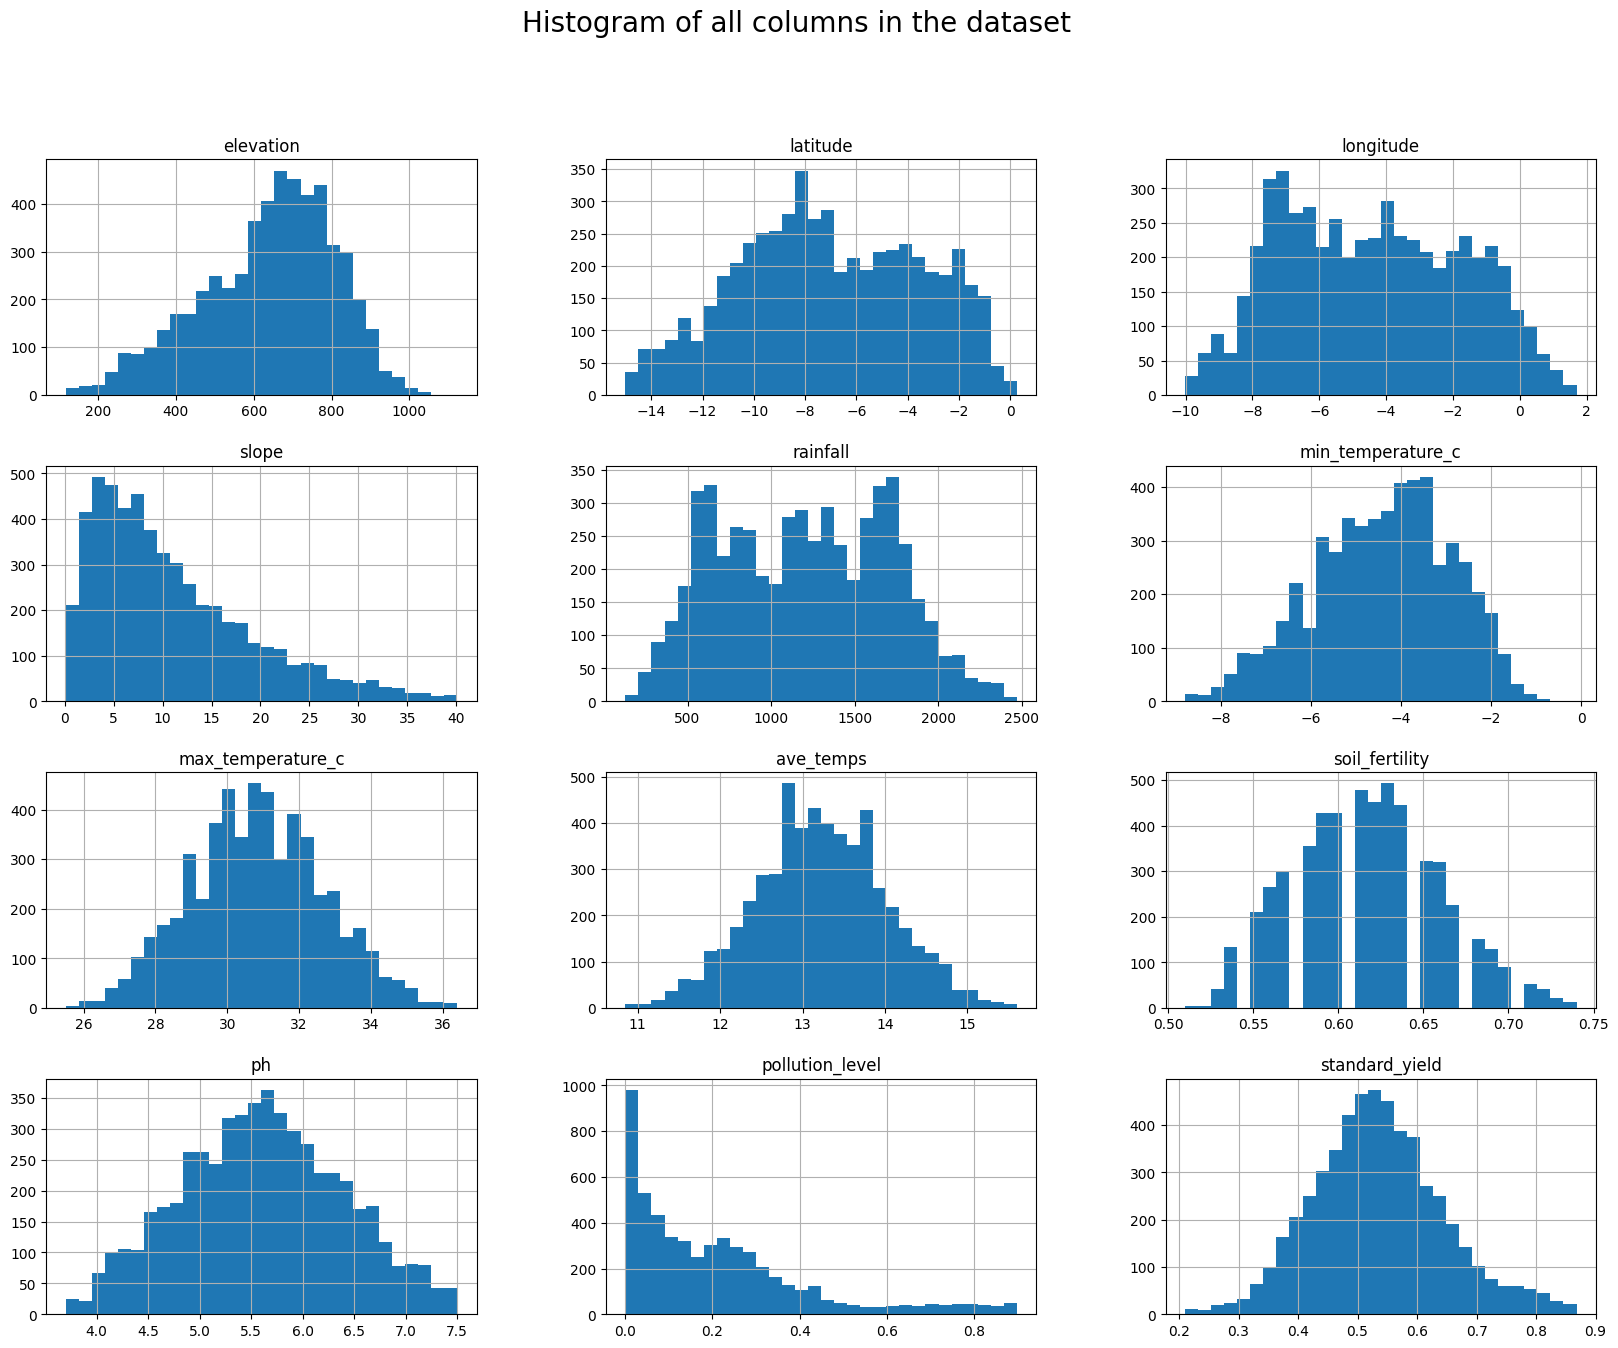

In [10]:
pl = Plotting(my_data.data)
pl.plot_histogram()

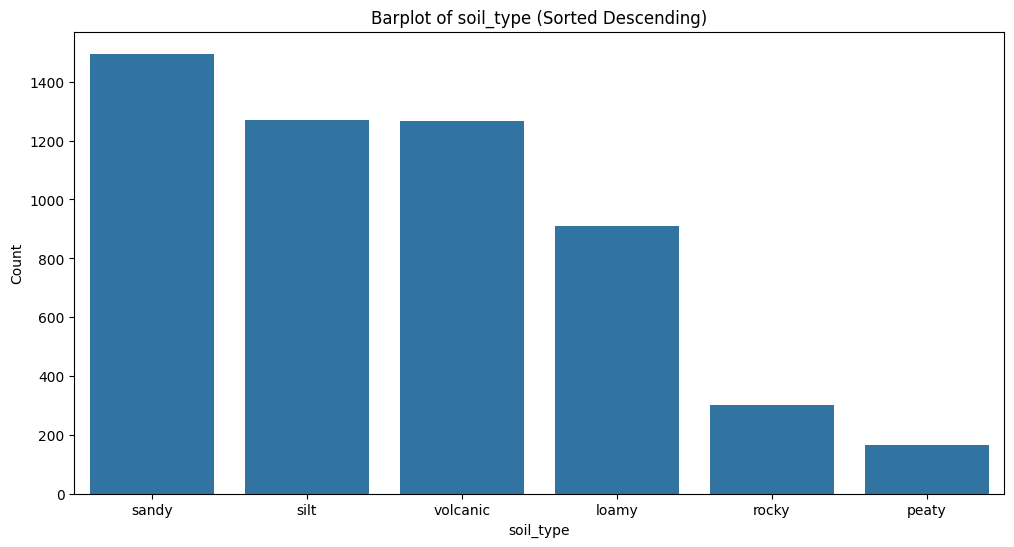

In [11]:
pl.plot_barchart("soil_type")

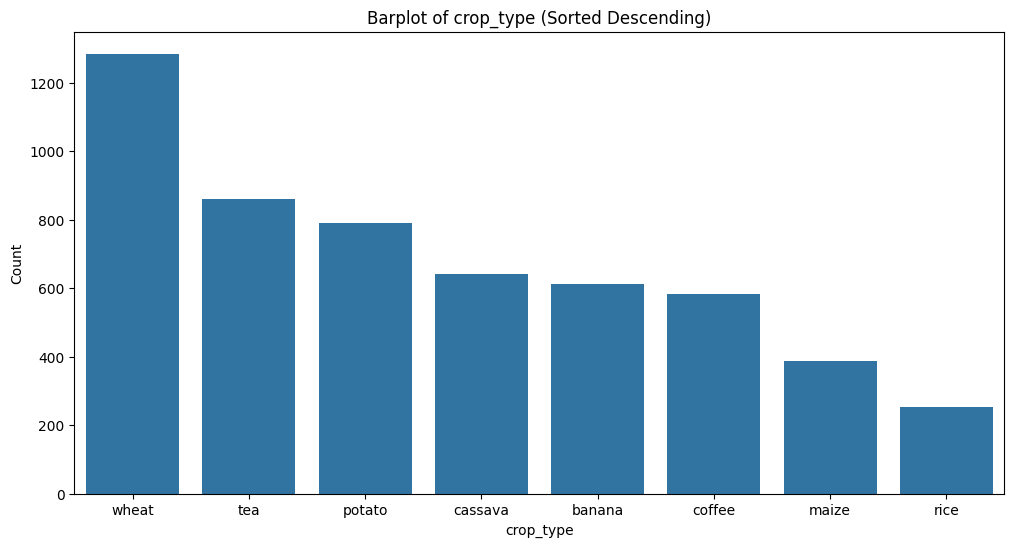

In [12]:
pl.plot_barchart("crop_type")

### Bivariate Analysis

<Figure size 1200x600 with 0 Axes>

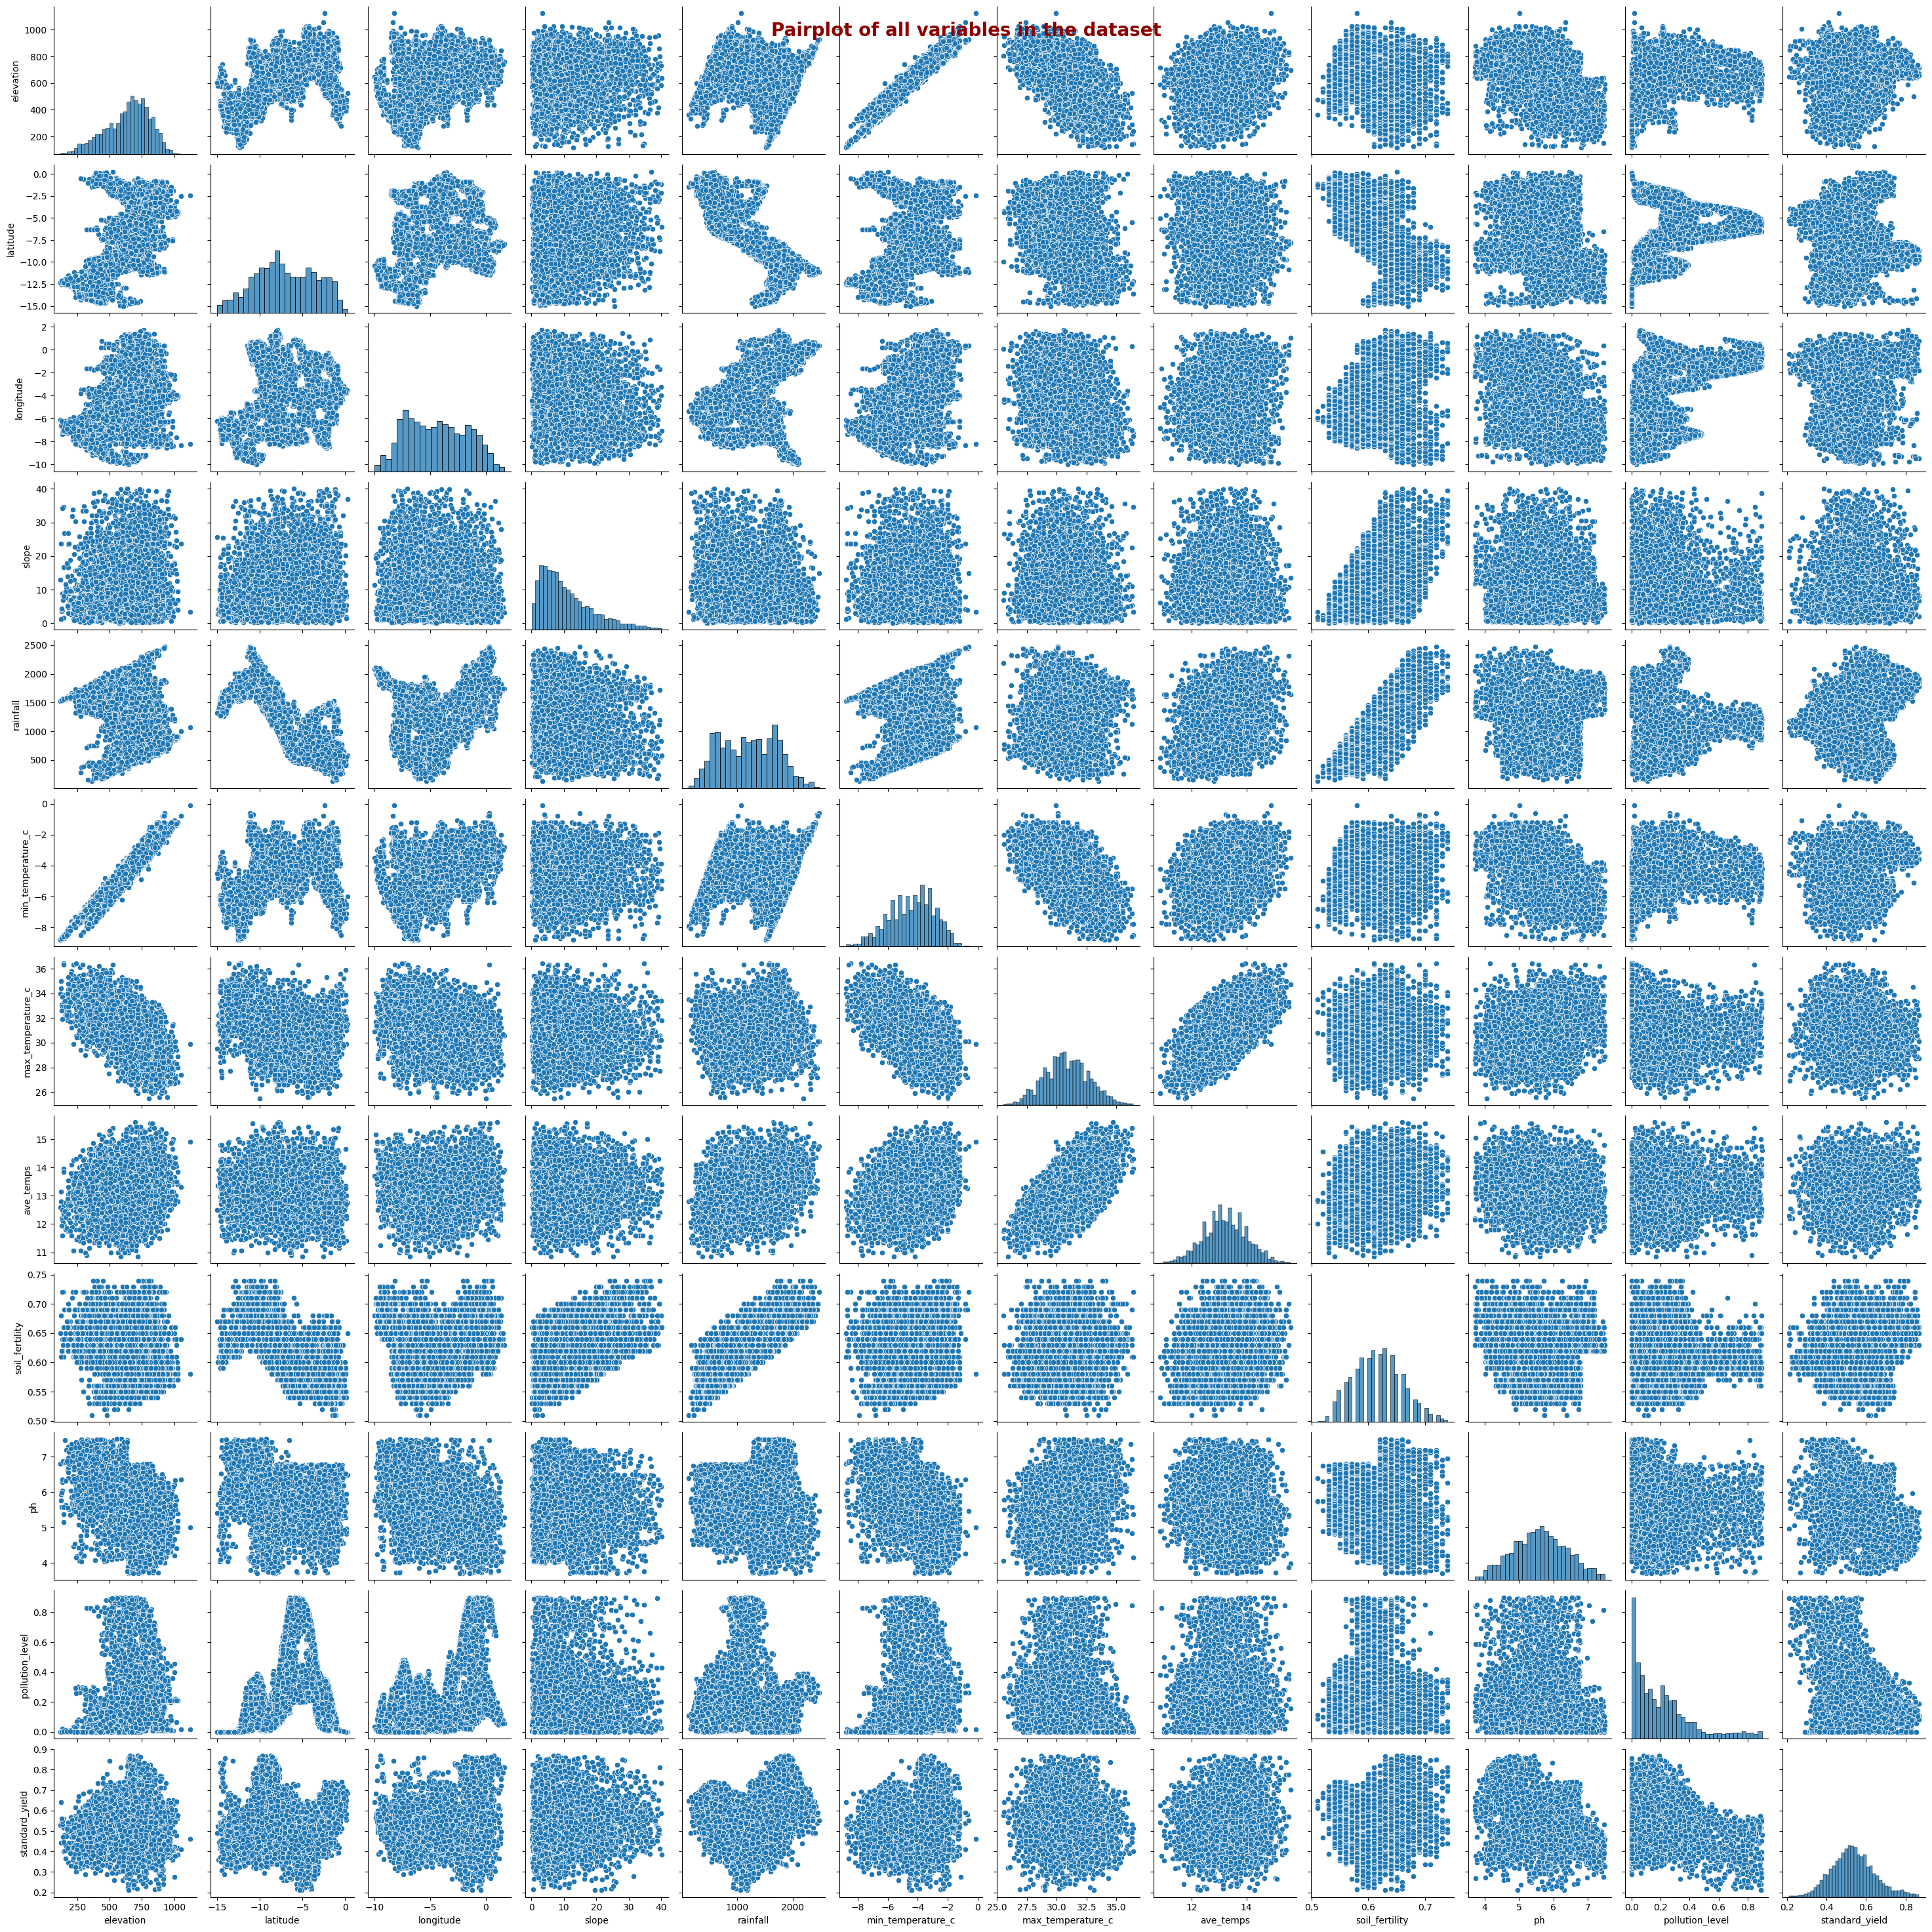

In [13]:
pl.plot_pairplot()

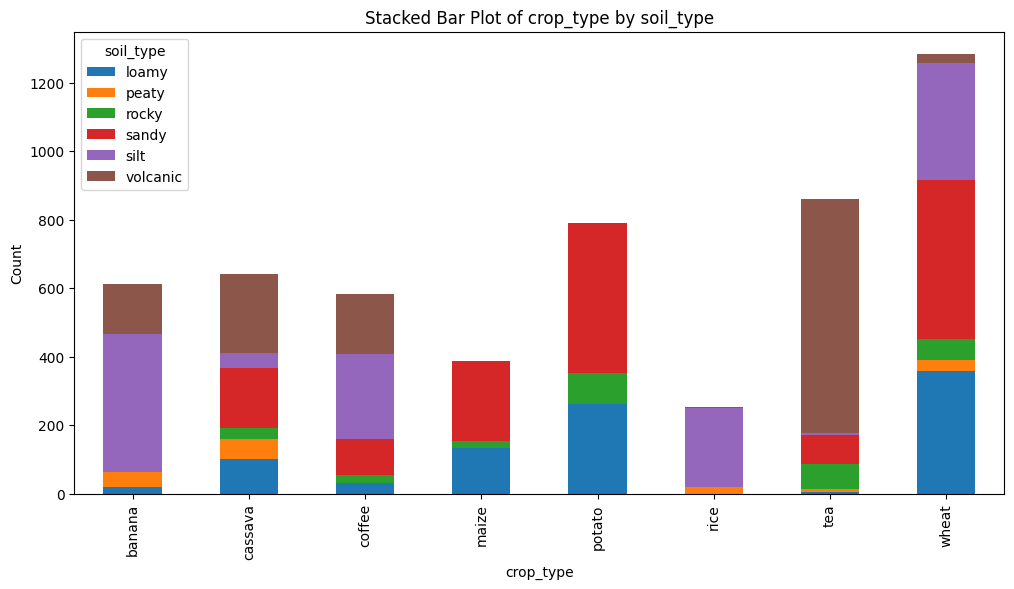

In [14]:
pl.plot_stackedbar("crop_type", "soil_type")

In [15]:
# categorical columns
cat_col = my_data.select_columns()
cat_col

Index(['location', 'soil_type', 'crop_type'], dtype='object')

In [16]:
cat_col = list(cat_col)

In [17]:
# label encoding
my_data.lable_encode(cat_col)

elevation   latitude  longitude  location      slope  rainfall  \
0     786.05580  -7.389911  -7.556202         0  14.795113    1125.2   
1     674.33410  -7.736849  -1.051539         4  11.374611    1450.7   
2     826.53390  -9.926616   0.115156         4  11.339692    2208.9   
3     574.94617  -2.420131  -6.592215         3   7.109855     328.8   
4     331.35538 -13.409517  -6.722849         2   5.907423    1586.0   
...         ...        ...        ...       ...        ...       ...   
5402  681.36145  -7.358371  -6.254369         0  16.213196     885.7   
5403  667.02120  -3.154559  -4.475046         3   2.397553     501.1   
5404  670.77900 -14.472861  -6.110221         2   7.636470    1586.6   
5405  429.48840 -14.653089  -6.984116         2  13.944720    1272.2   
5406  763.09030  -4.317028  -6.344461         3  35.189430     516.4   

      min_temperature_c  max_temperature_c  ave_temps  soil_fertility  \
0                  -3.1               33.1      15.00            0.62   
1                  -3.9               30.6      13.35            0.64   
2                  -1.8               28.4      13.30            0.69   
3                  -5.8               32.2      13.20            0.54   
4                  -6.8               31.8      12.50            0.63   
...                 ...                ...        ...             ...   
5402               -4.3               33.4      14.55            0.61   
5403               -4.8               32.1      13.65            0.54   
5404               -3.8               33.4      14.80            0.64   
5405               -6.2               34.6      14.20            0.63   
5406               -3.8               29.6      12.90            0.64   

      soil_type        ph  pollution_level  crop_type  standard_yield  
0             3  6.169393     8.526684e-02          1        0.577964  
1             5  5.676648     3.996838e-01          1        0.486302  
2             5  5.331993     3.580286e-01          6        0.649647  
3             0  5.328150     2.866871e-01          1        0.532348  
4             4  7.061317     4.315457e-07          0        0.342871  
...         ...       ...              ...        ...             ...  
5402          3  5.741063     3.286828e-01          4        0.554482  
5403          3  5.445833     1.602583e-01          3        0.438194  
5404          5  5.385873     8.221326e-09          6        0.800776  
5405          4  5.562508     6.917245e-10          1        0.507595  
5406          3  5.087792     2.612715e-01          7        0.453064  

[5407 rows x 15 columns]

In [18]:
# save the labeled data
data = my_data.data
data.to_csv("../data/labeled/labeled_agric_survey_data_cleaned.csv", index=False)